In [15]:
import pytesseract
import numpy as np
import cv2 as cv2
import os
from PIL import Image
import argparse
import pyocr
from matplotlib import pyplot as plt
from PyPDF2 import PdfFileReader
from pdf2image import convert_from_path
from wand.image import Image as wand
import urllib.request
import io


In [16]:
# Extracting text embedded in PDF (metadata) with pypdf2 on each page REQUIRES FURTHER DEVELOPMENT

def text_extractor(path):
    with open(path, 'rb') as f:
        pdf = PdfFileReader(f)
        
        #get the first page
        page = pdf.getPage(5)
        print(page)
        print('Page type: {}'.format(str(type(page))))
        
        text = page.extractText()
        print(text)
        
##Get PDF metadata from PDF
        
def get_info(path):
    with open(path, 'rb') as f:
        pdf = PdfFileReader(f)
        info = pdf.getDocumentInfo()
        number_of_pages = pdf.getNumPages()
        
    print(info)
 
    author = info.author
    creator = info.creator
    producer = info.producer
    subject = info.subject
    title = info.title

In [18]:
get_info('Images/Artificial-Intelligence-and-National-Security.pdf')
text_extractor('Images/Artificial-Intelligence-and-National-Security.pdf')

{'/Author': 'R45178', '/CreationDate': "D:20180427144720-04'00'", '/ModDate': "D:20180430182154-04'00'", '/Subject': 'via Federation of American Scientists', '/Title': 'Artificial Intelligence and National Security'}
{'/Annots': [IndirectObject(175, 0), IndirectObject(176, 0)], '/Contents': IndirectObject(10, 0), '/CropBox': [0, 0, 612, 792], '/Group': {'/CS': '/DeviceRGB', '/S': '/Transparency', '/Type': '/Group'}, '/MediaBox': [0, 0, 612, 792], '/Parent': IndirectObject(2213, 0), '/Resources': {'/ExtGState': {'/GS87': IndirectObject(165, 0), '/GS88': IndirectObject(164, 0)}, '/Font': {'/F1': IndirectObject(2232, 0), '/F11': IndirectObject(173, 0), '/F12': IndirectObject(169, 0), '/F13': IndirectObject(182, 0), '/F2': IndirectObject(2235, 0), '/F7': IndirectObject(155, 0), '/F8': IndirectObject(149, 0)}, '/ProcSet': ['/PDF', '/Text', '/ImageB', '/ImageC', '/ImageI']}, '/Rotate': 0, '/StructParents': 12, '/Tabs': '/S', '/Type': '/Page'}
Page type: <class 'PyPDF2.pdf.PageObject'>
Artifi

In [5]:
# IN DEVELOPMENT - Convert PDF to Image and save as a file

pages = convert_from_path('Images/03_VDOT_STD_Specs.pdf', first_page=3, last_page=3)
pages.save('out.jpg', 'JPEG')
newimage = cv2.imread(pages)
raw_results = run_tesseract(newimage)

AttributeError: 'list' object has no attribute 'save'

In [15]:
#Function to convert a PDF to an image, and run it through tesseract.

#with urllib.request.urlopen('file:///home/user/Documents/TestDocs/test.pdf') as response:
    #pdf_read = response.read()
    
#source https://stackoverflow.com/questions/31095025/converting-a-remote-pdfs-pages-to-temporary-images-for-ocr

#pdf_read = 'Images/03_VDOT_STD_Specs.pdf'
#pdf_im = PdfFileReader('Images/03_VDOT_STD_Specs.pdf')
#text = []
#print(pdf_im.getNumPages())
#for p in range(pdf_im.getNumPages()):
 #   with wand(filename='Images/03_VDOT_STD_Specs.pdf') as img:
  #      img_buffer=np.asarray(bytearray(img.make_blob()), dtype=np.uint8)
   #     retval = cv2.imdecode(img_buffer, cv2.IMREAD_GRAYSCALE)
    #    text.append(pytesseract.image_to_string(Image.fromarray(retval)))
    
    
pdf_im = PdfFileReader('Images/03_VDOT_STD_Specs.pdf')
text = []
tempFile_Location = 'Output/tempfile.jpg'
for p in range(pdf_im.getNumPages()):
    with wand(filename='Images/03_VDOT_STD_Specs.pdf' + '[' + str(p) + ']') as img:
        with wand(image = img) as converted: #Need second with to convert SingleImage object from wand to Image
            converted.save(filename='Images/03_VDOT_'+ '[' + str(p) + ']')
            text.append(pytesseract.image_to_string(Image.open(tempFile_Location)))
            os.remove(tempFile_Location)

In [9]:
print(text)

['2016 ROAD & BRIDGE STANDARDS\n\n \n\n \n\n \n\nSEWER CLEANOUT\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\nBOG ROAD & BRIDGE STANDARDS', '2016 ROAD & BRIDGE STANDARDS\n\n \n\n \n\n \n\nSEWER CLEANOUT\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\nBOG ROAD & BRIDGE STANDARDS', '2016 ROAD & BRIDGE STANDARDS\n\n \n\n \n\n \n\nSEWER CLEANOUT\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\nBOG ROAD & BRIDGE STANDARDS', '2016 ROAD & BRIDGE STANDARDS\n\n \n\n \n\n \n\nSEWER CLEANOUT\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\nBOG ROAD & BRIDGE STANDARDS', '2016 ROAD & BRIDGE STANDARDS\n\n \n\n \n\n \n\nSEWER CLEANOUT\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\nBOG ROAD & BRIDGE STANDARDS', '2016 ROAD & BRIDGE STANDARDS\n\n \n\n \n\n \n\nSEWER CLEANOUT\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\nBOG ROAD & BRIDGE STANDARDS', '2016 ROAD & BRIDGE STANDARDS\n\n \n\n \n\n \n\nSEWER CLEANOUT\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\nBOG ROAD & BRIDGE STANDARDS', '2016 ROAD &

In [4]:
## Image Processing Method #1 https://medium.freecodecamp.org/getting-started-with-tesseract-part-i-2a6a6b1cf75e
#https://gist.github.com/bkaankuguoglu/111f9f5e0c30b5f57d7c5338d6dcb6fc



def apply_threshold(img, argument):
    switcher = {
        1: cv2.threshold(cv2.GaussianBlur(img, (9, 9), 0), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1],
        2: cv2.threshold(cv2.GaussianBlur(img, (7, 7), 0), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1],
        3: cv2.threshold(cv2.GaussianBlur(img, (5, 5), 0), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1],
        4: cv2.threshold(cv2.medianBlur(img, 5), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1],
        5: cv2.threshold(cv2.medianBlur(img, 3), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1],
        6: cv2.adaptiveThreshold(cv2.GaussianBlur(img, (5, 5), 0), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2),
        7: cv2.adaptiveThreshold(cv2.medianBlur(img, 3), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2),
        8: cv2.threshold(cv2.GaussianBlur(img, (3, 3), 0), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1],
    }
    return switcher.get(argument, "Invalid method")


def get_string(img_path, method):
    # Read image using opencv
    img = cv2.imread(img_path)
    img_orig = cv2.imread(img_path)
    output_dir = "Output"

    # Extract the file name without the file extension
    file_name = os.path.basename(img_path).split('.')[0]
    file_name = file_name.split()[0]

    # Create a directory for outputs
    output_path = os.path.join(output_dir, file_name)
    if not os.path.exists(output_path):
        os.makedirs(output_path)
        
    # Rescale Image to 1.5 the previous size
    img = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)
    
    # Convert to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply dilation and erosion to remove noise
    kernel = np.ones((1, 1), np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)
    img = cv2.erode(img, kernel, iterations=1)
    
    ## Depricated for apply_threshold method
    # Apply blur to smooth out the edges
    ##img = cv2.GaussianBlur(img, (3, 3), 0)
        
    # Apply threshold to get image with only b&w (binarization)
    ##img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    
    img = apply_threshold(img, method)
    
    # Save the filtered image in the output directory
    #save_path = os.path.join(output_path, file_name + "_filter_" + ".jpg")
    #cv2.imwrite(save_path, img)
    ##cv2.imshow("Output", img)

    # Plot Image
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])
    plt.show()
    
    #Commenting out actual processing of image so filters can be 
    #result = pytesseract.image_to_string(img, lang="eng")
    return img


In [10]:
testfile = "Images/picture1.jpg"

raw_results = []
no_empties = []
try2 = []   
    
preprocessedimages = get_string2(testfile)
raw_results = run_tesseract(preprocessedimages)
no_empties = remove_blanks(raw_results)

NameError: name 'get_string2' is not defined

In [11]:
def run_tesseract(image):
    result = []

    ##No longer needed as this was split to functiontest = "Images/picture1.jpg"
    
    result = pytesseract.image_to_string(image, lang="eng")
    
    #boxes = pytesseract.image_to_boxes(get_string(test), lang="eng")
    #print("Original Image Results")
    #pytesseract.image_to_string(Image.open(test))
    #

    # Split Results into an array
    result = result.split('\n')

    return result



In [12]:
def remove_blanks(result):
    no_empties = []
    no_empties = list(filter(None, result))
    num_results = len(no_empties)    
    print(num_results)
    
    for x in range(num_results):
        print("Line", x, " = ", no_empties[x])
        ##if x != 0:
          ##  no_empties.append(result[x])
                   
    return no_empties
    

79
Line 0  =  35" SURFACE TO INTERSECT NORMAL
Line 1  =  SURFACE WITHIN 4.005 OF CENTERLINE,
Line 2  =  A.410-.420
Line 3  =  i ©
Line 4  =    
Line 5  =   
Line 6  =    
Line 7  =    
Line 8  =   
Line 9  =   
Line 10  =  THESE HOLES MUST BE PARALLEL WITHIN,
Line 11  =    
Line 12  =     
Line 13  =    
Line 14  =    
Line 15  =   
Line 16  =      
Line 17  =     
Line 18  =   
Line 19  =       
Line 20  =      
Line 21  =   
Line 22  =    
Line 23  =   
Line 24  =     
Line 25  =       
Line 26  =  sect L- !
Line 27  =  eT Car 45° +0"30" we 08 BN 3.00 INCHES IN BOTH PLANES
Line 28  =  120,
Line 29  =  #3388 °0/
Line 30  =  ROD TO BE CORRECTED 9855 _|
Line 31  =  FOR WEIGHT BY J 199830 TRAVEL OF CUTTER
Line 32  =  MACHINING AND DRILLING 505 / 120/ FOR SERVICE | / FOR MACHINING
Line 33  =  THIS LUG AS SHOWN — #8 / ey ONLY / $1335 MIN
Line 34  =  os ,
Line 35  =  /AbEDSURE FINISH BORE 229" £0" 15’ MIN
Line 36  =  DIA IN THIS DIRECTION, Too GUUTER
Line 37  =  MUST BE ROUND 225° 20° 1S’ M

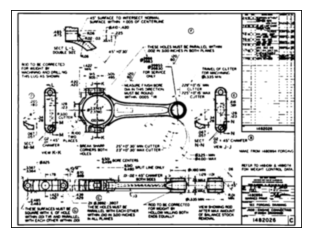

30
Line 0  =  743° SUMFACE TO INTERSECT NORMAL
Line 1  =  , SURFACE WITHIN © 005 OF CENTERLI
Line 2  =  “MEASURE F NSH BORE
Line 3  =  DAWN Tes OREC TION
Line 4  =  + REAR SHARD
Line 5  =  CORNERS BOTH
Line 6  =  woes
Line 7  =  25° 90" 30’ MIN CUTTER -
Line 8  =  ~ $53, cone cenrens
Line 9  =  = - -——-$8% st ne ony
Line 10  =  2¥ +0" 20' MAX CUTTER”
Line 11  =  Trak OF CUTTER
Line 12  =  FOR MALI NING
Line 13  =  Gass wn
Line 14  =  ’
Line 15  =  229° #0 Ss ta
Line 16  =  CLITER
Line 17  =  “72$° 90° MAK
Line 18  =  ~* .
Line 19  =  CUTTER
Line 20  =  veiw J-J
Line 21  =  *»
Line 22  =  “OL “Bozo. uax
Line 23  =  MARL FROM 1400994 FORGNG
Line 24  =  REFLA TO 1400100 & 401014
Line 25  =  FOR WEKMT CONTROL DATA,
Line 26  =  <n. TO OE CORRECTED
Line 27  =  FOR WUGHT OV
Line 28  =  HOLLOW MALLING BOTH
Line 29  =  NOS EQUALLY
['743° SUMFACE TO INTERSECT NORMAL', ', SURFACE WITHIN © 005 OF CENTERLI', '“MEASURE F NSH BORE', 'DAWN Tes OREC TION', '+ REAR SHARD', 'CORNERS BOTH', 'woes', '25° 9

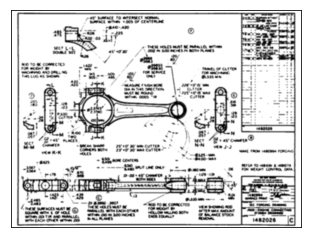

32
Line 0  =  ROC TO BE CORRECTED
Line 1  =  FOR WEIGHT BY
Line 2  =  MACHINING AND DMLL.NG
Line 3  =  THIS LUG AS SHOWN.
Line 4  =  é
Line 5  =   
Line 6  =  [45° SURFACE TO INTERSECT NORMAL
Line 7  =  SURFACE WITHIN 1.005 OF CENTERLINE
Line 8  =  ©
Line 9  =  : - PARALLEL WITHIN
Line 10  =  . 48° 030° JS BOTH PLANES
Line 11  =  A J a
Line 12  =  - TRAVEL OF CUTTER
Line 13  =  FOR MACHOUNG
Line 14  =  i335 WN
Line 15  =  229° *0° 1S MIN
Line 16  =  Dia IN THIS OREC TION. — CUTTER
Line 17  =  MUST BE ROUND pas? O° tS MAX
Line 18  =  WITH, 0005 IR eit 2 CUTTER
Line 19  =  n O02 5 45° CHAMFER
Line 20  =  25°80" 90° MIN CUTTER —_ . view J-J
Line 21  =  23°10" 30° MAX CUTTER - Oy WAAL FROM 1480994 FORAGING
Line 22  =  ‘\_ 9325 - an
Line 23  =  ~ $501, cone centers ~ © \7-6400-max
Line 24  =  Fs
Line 25  =  + BEG PUT UNE OMY = go ns 08 FOR WEKeT CONTROL DATA,
Line 26  =  1-02» 45° CHAMFER y > ~ 28 Ut
Line 27  =  GOTH SIDES :
Line 28  =  a
Line 29  =  THESE HOLES MUST Of foe. TO BE CORRECTED

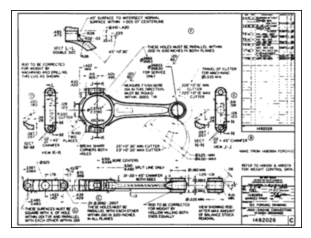

54
Line 0  =  sec’ L-L
Line 1  =  ROC TO BE CORRECTED
Line 2  =  FOR WEIGHT BY
Line 3  =  MACHINING AND DAILL.NG
Line 4  =  THIS LUG AS SHOWN
Line 5  =  7 THESE SURFACES MUST BE
Line 6  =  SQUARE WITH € OF HOLE
Line 7  =  WITHIN .OOI TIR AND PARALLEL
Line 8  =  WITH EACH OTHER WITHIN O01
Line 9  =  45° SURFACE TO INTERSECT NORMAL
Line 10  =  SURFACE WITHIN 2.005 OF CENTERLINE
Line 11  =  ©
Line 12  =  .002 IN 3.00 INCHES IN BOTH PLANES
Line 13  =  THESE HOLES MUST BE PARALLEL WITHIN
Line 14  =  as *0° 20 /\ \
Line 15  =  aan
Line 16  =  MEASURE F'NISH BORE
Line 17  =  OIA IN THIS OIREC TION.
Line 18  =  MUST BE ROUND
Line 19  =  WITH 0005 “IR
Line 20  =  25° 20° 30° MIN CUTTER
Line 21  =  23° 20° 30° MAX CUTTER-_
Line 22  =  = £501 -
Line 23  =  $50, GORE CENTERS
Line 24  =  = — ———-B39 seuit Live onty-
Line 25  =  aA
Line 26  =  br + D180 MIN
Line 27  =  , TRAVEL OF CLTTER
Line 28  =  FOR MACHINING
Line 29  =  @.335 MN
Line 30  =  ’
Line 31  =  229° #0" 1S" MIN
Line 32  =  CUTTER
Line

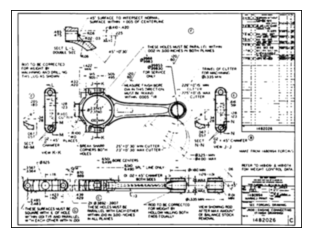

58
Line 0  =  7 45° SURFACE TO INTERSECT NORMA,
Line 1  =  "SURFACE wiT@n 9 005 OF CENTEALINE
Line 2  =  BAD -.420
Line 3  =  > 22s
Line 4  =  ,
Line 5  =  as oO
Line 6  =  4
Line 7  =  Ro. 7O BE CORRECTED
Line 8  =  FOR wiKatT BY
Line 9  =  Ma INN AND O08 WG
Line 10  =  TH UG AS SOA
Line 11  =  MASI FSH ORE
Line 12  =  Cun Teas SECT OM
Line 13  =  MUST Bt ROUND
Line 14  =  witha, COOS “IR
Line 15  =  Laces
Line 16  =  + BREAK SHARD
Line 17  =  CORNERS 80°
Line 18  =  mats
Line 19  =  29° 90° 30° CUTTER «_
Line 20  =  23° 0° 20 MAX CUTTER ~
Line 21  =  ~ 6500
Line 22  =  6.499 COME CENTERS
Line 23  =  "LINE Ofer:
Line 24  =  G1 02 * 49° CHAMMER 5 >
Line 25  =  @oTn 08s,
Line 26  =  hoo TO O£ CORMECTEO
Line 27  =  FOR WUGHT OY
Line 28  =  HOLLOW MELLING SOTH
Line 29  =  ENDS FCUALLY
Line 30  =  CARALLOL WITH CACH OTHER
Line 31  =  WITION DO IN 100 -NCHES
Line 32  =  WM EACH OTHER WIT N Br ALL LANES
Line 33  =   
Line 34  =  ©
Line 35  =  7 UES MOS MUST Of PARALLEL witha
Line 36  =  >» O

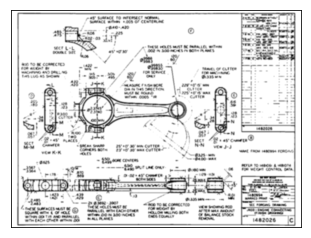

67
Line 0  =  ROR TO BE CORRECTED
Line 1  =  FOR WEIGHT 8Y
Line 2  =  MACHINING AND DRILL.NG
Line 3  =  THIS LUG AS SHOWN
Line 4  =  Two
Line 5  =  88 a5"
Line 6  =  CHAMFER
Line 7  =  view K-K
Line 8  =  = 8.625
Line 9  =  33567 4
Line 10  =  3564 *
Line 11  =  , Peers:
Line 12  =  a 1423 0
Line 13  =  easy | Ae
Line 14  =  3483
Line 15  =  A THESE SURFACES MUST BE
Line 16  =  SQUARE WITH € OF HOLE
Line 17  =  WITHIN OO1 TIR AND PARALLEL
Line 18  =  WITH EACH OTHER WITHIN 00
Line 19  =  PLACES .”
Line 20  =  “BREAK SHARP
Line 21  =  CORNERS BOTH
Line 22  =  HOLES
Line 23  =  45° SURFACE TO INTERSECT NORMAL
Line 24  =  7 SURFACE WITHIN 2.005 OF CENTERLINE
Line 25  =  2 FO-410-.420
Line 26  =  ©
Line 27  =  : THESE HOLES MUST BE PARALLEL WITHIN
Line 28  =  45° 0°30" J .002 IN 3.00 INCHES IN BOTH PLANES
Line 29  =  3 120
Line 30  =  J $3383 : 6o/
Line 31  =  L 33838:
Line 32  =  FOR SERVICE
Line 33  =  BY Soa
Line 34  =  TRAVEL OF CLITER
Line 35  =  FOR MACHINING
Line 36  =  G1335 MN
Lin

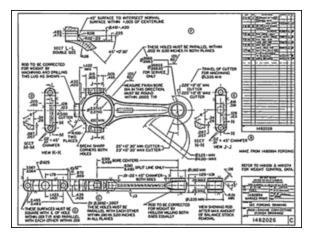

42
Line 0  =  45° SURFACE TO INTERSECT NORMAL
Line 1  =  SURFACE WITHIN 8.005 OF CENTERLINE
Line 2  =  ©
Line 3  =  sect L-L THESE HOLES MUST BE PARALLEL WITHIN
Line 4  =  DOUBLE SIZE 002 IN 3.00 INCHES IN BOTH PLANES
Line 5  =  ROO TO BE CORRECTED
Line 6  =  FOR WEIGHT BY TRAVEL OF CUTTER
Line 7  =  MACHINING AND DRILLING : FOR MACHINING
Line 8  =  THIS LUG AS SHOWN @335Mn
Line 9  =  MEASURE FINISH BORE 229° #0" 1S" MIN
Line 10  =  DIA IN THIS ORECTION,
Line 11  =  MUST BE ROUND
Line 12  =  WITHIN 0005 TIR
Line 13  =  OT eT st ot det tet]
Line 14  =  -—
Line 15  =  =
Line 16  =  es
Line 17  =  Pe
Line 18  =  ae
Line 19  =  ard
Line 20  =  I
Line 21  =  =
Line 22  =  —
Line 23  =  =
Line 24  =  =
Line 25  =  =|
Line 26  =  =
Line 27  =  =
Line 28  =  =
Line 29  =  a
Line 30  =  =
Line 31  =  25° £0° 30° MIN CUTTER
Line 32  =  23° 20° 30° MAX CUTTER
Line 33  =  650
Line 34  =  G50, BORE CENTERS
Line 35  =  6510 REFER TO 1481061 & 1481074
Line 36  =  6.490 SPLIT LINE ONLY 06 FOR WEKGHT C

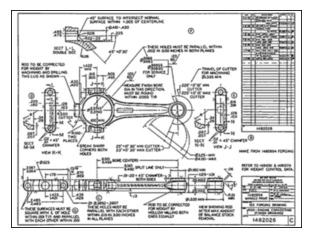

34
Line 0  =  SecT L-L
Line 1  =  DOUBLE SIZE
Line 2  =  ROD TO BE CORRECTED
Line 3  =  FOR WEIGHT BY
Line 4  =  MACHINING ANO DRILLING
Line 5  =  THIS LUG AS SHOWN .
Line 6  =  THESE SURFACES MST BE
Line 7  =  SQUARE WITH ¢ OF HOLE
Line 8  =  WITHIN 001 TIR AND PARALLEL
Line 9  =  WITH EACH OTHER WITHIN OO1
Line 10  =  45° SURFACE TO INTERSECT NORMAL
Line 11  =  SURFACE WITHIN. 4.008 OF CENTERLINE
Line 12  =  ©
Line 13  =  THESE HOLES MUST BE PARALLEL WITHIN
Line 14  =  aS° 030" 002 IN 3.00 INCHES IN BOTH PLANES
Line 15  =  TRAVEL OF CUTTER
Line 16  =  FOR MACHINING
Line 17  =  i335 MN
Line 18  =  MEASURE FINISH BORE 229° ©0° 15’ MIN
Line 19  =  CIA IN THIS ORRECTION,
Line 20  =  MUST BE ROUND
Line 21  =  WITHIN 0005 TIR
Line 22  =  N
Line 23  =  ©
Line 24  =  “82 x 45° CHAMFER
Line 25  =  25° *0° 30’ MIN CUTTER view J-J
Line 26  =  23° 10° 30° MAX CUTTER MAKE FROM 1480994 FORGING
Line 27  =  REFER TO 148106! & 1481074
Line 28  =  6.490 SPLIT LINE ONLY . ! FOR WEIGHT CONTROL DATA,
Lin

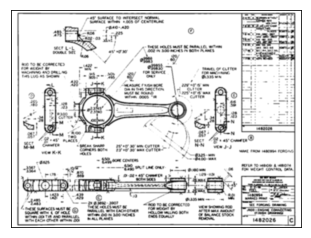

38
Line 0  =  45° SURFACE TO INTERSECT NORMAL
Line 1  =  SURFACE WITHIN 4.005 OF CENTERLINE
Line 2  =  7410 -.420
Line 3  =  ©
Line 4  =  DOUBLE SIZE -002 IN 3.00 INCHES IN BOTH PLANES
Line 5  =  ». 120
Line 6  =  L oe - 60
Line 7  =  RoW TO BE CORRECTED 7 855
Line 8  =  FOR WEIGHT BY - @33883- , TRAVEL OF CLITER
Line 9  =  MACHINING AND D&ILL.NG 120 FOR SERVICE . “FOR MACHINING
Line 10  =  THIS LUG AS SHOWN — fd Oe ONLY ’ Oia35 MN
Line 11  =  ‘’
Line 12  =  AME ASURE FINISH BORE 229° £0" 15" MIN
Line 13  =  O1A IN THIS DIRECTION. ct CUTTER
Line 14  =  MUST BE ROUND ‘Last 1071S’ MAX
Line 15  =  WITHIK: 0005 "IR _ CUTTER
Line 16  =  sect L-L } ! THESE HOLES MUST BE PARALLEL WITHIN
Line 17  =  as 20° 30° / Se
Line 18  =  N
Line 19  =  6-02 5 ase cuaeer ©
Line 20  =  vitw J-J
Line 21  =  «$2 44S" PLACES
Line 22  =  CHAMFER “BREAK SHARP 25° #0 30’ MIN CUTTER
Line 23  =  CORNERS BOTH 23° 80° 30° MAX CUTTER :
Line 24  =  vigw K-K HOLES A gazs- ain MAKE FROM 1480994 FCRGING
Line 25  =  . 6501

In [14]:
testfile = "Images/02_Engine_Rod.jpg"

methods = 8

## All threshold methods 
##        1: cv2.threshold(cv2.GaussianBlur(img, (9, 9), 0), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1],
##        2: cv2.threshold(cv2.GaussianBlur(img, (7, 7), 0), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1],
##        3: cv2.threshold(cv2.GaussianBlur(img, (5, 5), 0), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1],
##        4: cv2.threshold(cv2.medianBlur(img, 5), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1],
##        5: cv2.threshold(cv2.medianBlur(img, 3), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1],
##        6: cv2.adaptiveThreshold(cv2.GaussianBlur(img, (5, 5), 0), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2),
##        7: cv2.adaptiveThreshold(cv2.medianBlur(img, 3), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2),
##        8: cv2.threshold(cv2.GaussianBlur(img, (3, 3), 0), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1],

## Results From Original Image

raw_results = run_tesseract(cv2.imread(testfile))
no_empties = remove_blanks(raw_results)

for x in range(1, methods + 1):
    raw_results = []
    no_empties = []
    
    print("\n", "Method ", x, "\n")
    preprocessedimages = get_string(testfile, x)
    raw_results = run_tesseract(preprocessedimages)
    no_empties = remove_blanks(raw_results)
    print(no_empties)


In [40]:
pytesseract.image_to_string(cv2.imread("Images/picture1.jpg"), lang="eng")

'7 1 6 1 s 1 4 1 2 7 2 1 i\nSeer 5\nA aearhee =\n- Eh ai GEAR SHIFT HANDLE 7 ae: Pe\nSHET YORE\nrip a DRIVE GEAR\n} OT Bi sopnox. 18\nb if Ses °\n: J—— FINGER Pn (2 Soom Bik Sc\no}- vem\nat\nDRIVE SHAFT FOLLOWER GEAR SCALE: 7/8:1 s ¥ . 6c SPL! 8\nee mae anon /4 an\nTRANSMISSION COVER PLATE a 2 Fe 1b APeROK. CLEARANCE DRIVE GEAR DET,\noe rn HET YOKE OETA Sour ra\n| ‘SCALE: 7/821\n4 ae | soi | 4\nath A t wet voKe TReviRA. rostrion nore: sorrom tapeep |S\nTory WA Ma ancy st 4 ES ele\nEAs a B : STEEL PLATE FRM\nonwe azar & ("| ean sur GEAR, SHET HANDLE eer ;\nBee" BEean -c : a Suppoat Pare ioe at ve\n4 3 NO. 102 5 co Hnnating tt | |\n81212 roReINGTON Mh 2k Lab re (ee\'beraie “ary 4x 4-20 x § soowet tenn CaP Spoltace Tile f onseer\nae ee ein id ess el Let\nsie, Penne FH RRS, 7 iat 2\nwens BB INT?\nauc See oe\nbist sQ\\ 2-H ~ REESE GEARING 4 ax F1suc-28 2 |\nae ha @Na shes Ly |\nis Ne sos fait |\ni ; \' era\n8\n1 :\nae\noe ong onex oi sive\nhed xser:ce\nLaie Sere\nbeads\nFREE ia : sere\nUTAH

In [42]:
pytesseract.image_to_data(cv2.imread("Images/picture1.jpg"), lang="eng")

'level\tpage_num\tblock_num\tpar_num\tline_num\tword_num\tleft\ttop\twidth\theight\tconf\ttext\n1\t1\t0\t0\t0\t0\t0\t0\t1230\t825\t-1\t\n2\t1\t1\t0\t0\t0\t31\t23\t1172\t18\t-1\t\n3\t1\t1\t1\t0\t0\t31\t23\t1172\t18\t-1\t\n4\t1\t1\t1\t1\t0\t31\t23\t1172\t18\t-1\t\n5\t1\t1\t1\t1\t1\t31\t23\t1172\t18\t95\t \n2\t1\t2\t0\t0\t0\t207\t40\t3\t18\t-1\t\n3\t1\t2\t1\t0\t0\t207\t40\t3\t18\t-1\t\n4\t1\t2\t1\t1\t0\t207\t40\t3\t18\t-1\t\n5\t1\t2\t1\t1\t1\t207\t40\t3\t18\t95\t \n2\t1\t3\t0\t0\t0\t223\t93\t48\t2\t-1\t\n3\t1\t3\t1\t0\t0\t223\t93\t48\t2\t-1\t\n4\t1\t3\t1\t1\t0\t223\t93\t48\t2\t-1\t\n5\t1\t3\t1\t1\t1\t223\t93\t48\t2\t95\t \n2\t1\t4\t0\t0\t0\t107\t97\t78\t2\t-1\t\n3\t1\t4\t1\t0\t0\t107\t97\t78\t2\t-1\t\n4\t1\t4\t1\t1\t0\t107\t97\t78\t2\t-1\t\n5\t1\t4\t1\t1\t1\t107\t97\t78\t2\t95\t \n2\t1\t5\t0\t0\t0\t79\t109\t75\t2\t-1\t\n3\t1\t5\t1\t0\t0\t79\t109\t75\t2\t-1\t\n4\t1\t5\t1\t1\t0\t79\t109\t75\t2\t-1\t\n5\t1\t5\t1\t1\t1\t79\t109\t75\t2\t95\t \n2\t1\t6\t0\t0\t0\t9\t10\t195\t127\t-1\t\n3\t1\t6\t

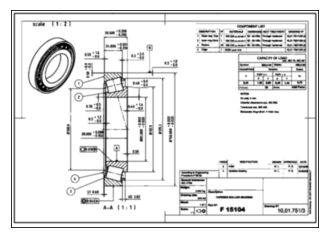

'scale\n\n7:72)\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\nDowning\n10,01.751/3'

In [35]:
pytesseract.image_to_string(get_string('testdrawing.jpg'), lang="eng")

In [3]:
## Image Preprocessing #2 https://www.pyimagesearch.com/2017/07/10/using-tesseract-ocr-python/
 
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True, help="path to input image to be OCR'd")
ap.add_argument("-p", "--preprocess", type=str, default="thresh", help="type of preprocessing to be done")
args = vars(ap.parse_args())

# load the example image and convert it to grayscale
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# check to see if we should apply thresholding to preprocess the
# image
if args["preprocess"] == "thresh":
    gray = cv2.threshold(gray, 0, 255,
    cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    
# make a check to see if median blurring should be done to remove
# noise
elif args["preprocess"] == "blur":
	gray = cv2.medianBlur(gray, 3)
    
# write the grayscale image to disk as a temporary file so we can
# apply OCR to it
filename = "{}.png".format(os.getpid())
cv2.imwrite(filename, gray)

# load the image as a PIL/Pillow image, apply OCR, and then delete
# the temporary file
text = pytesseract.image_to_string(Image.open(filename))
os.remove(filename)
print(text)
 
# show the output images
cv2.imshow("Image", image)
cv2.imshow("Output", gray)
cv2.waitKey(0)

usage: ipykernel_launcher.py [-h] -i IMAGE [-p PREPROCESS]
ipykernel_launcher.py: error: the following arguments are required: -i/--image


SystemExit: 2

/root/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [4]:
# Preprocessing #3 https://github.com/bharathirajatut/python-data-science/blob/master/handwritten-digit-recognition/google-tes-text-ocr.py

import cv2
import numpy as np
import pytesseract
from PIL import Image
from pytesseract import image_to_string

# Path of working folder on Disk
src_path = "tes-img/"

def get_string(img_path):
    # Read image with opencv
    img = cv2.imread(img_path)

    # Convert to gray
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 

    # Apply dilation and erosion to remove some noise
    kernel = np.ones((1, 1), np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)
    img = cv2.erode(img, kernel, iterations=1)

    # Write image after removed noise
    cv2.imwrite(src_path + "removed_noise.png", img)

    #  Apply threshold to get image with only black and white
    #img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)

    # Write the image after apply opencv to do some ...
    cv2.imwrite(src_path + "thres.png", img)

    # Recognize text with tesseract for python
    result = pytesseract.image_to_string(Image.open(src_path + "thres.png"))

    # Remove template file
    #os.remove(temp)

    return result


print('--- Start recognize text from image ---')
print(get_string(src_path + "cont.jpg") )

print("------ Done -------")

--- Start recognize text from image ---


FileNotFoundError: [Errno 2] No such file or directory: 'tes-img/thres.png'

In [34]:
print(pytesseract.image_to_string(Image.open('testdrawing.jpg')))


CHACTTY OF O40 so nom]
a

 

 

 

 

 

 

 

 

ro

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

10.01.7513


In [35]:
get_string('testdrawing.jpg')

error: OpenCV(3.4.1) /io/opencv/modules/imgproc/src/thresh.cpp:1406: error: (-215) src.type() == (((0) & ((1 << 3) - 1)) + (((1)-1) << 3)) in function threshold


In [17]:
print(pytesseract.image_to_string(Image.open("Images/picture1.jpg")))

1 6 l

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

  

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

4 1 3 1 2 1 1 = |
mere ah) Raa naeist Tape]
Sih chee GEAR SHIFT HANDLE TT ee se
go, SHIFT YOKE
7 DRIVE GEAR »
1 2 swonox. 91
| -fearmeel 7 ae mst cess
FINGER PIN (2 miken a
mie PN 1S Sis \
& a
oy
A G
; <<
arpa FOLLOWER GEAR SOE: 77831 A ee pune «bY
oN fin kere /4 a =
Tpayaurssion—/ coven PLATE say OO DRIVE GEAR DETAN -¢-
tore. ber 4 Te IFT_YOKE DETAIL SOMES FAL
| SCALE: 7/8:1
1 | ea aii wih 5
GEAR SHIFT KNOB
ete
RevtBA rostriow) nore: gorTow taPeeD
SHIFT YOKE sire
uy ee MEDIUM KOA
See Brane
DRIVE. EAR, GEAR SHIFT HANDLE
a reat a 0. toa 2
i , in tm see boys ox 4 0-3
1212, ropeinsron ili boat Lae Bee'Brane oar) ac 20 xf soot sew ow Solfiee
ReEbte ENS Sorby 1 te Looe mpen ced
8167 romincton SEY LotERS SEARS 8
eee INS REPRE
Sounwe ae tom ncton }
1 oe Jrene-2e
BPRS ge dismece |
235 rovmngr0 |
SELB
le) Log eee KN
8 24-+ Log sore 4
100-100 ravi t
ey \ REPRINT AIR 

In [19]:
print(pytesseract.image_to_boxes(Image.open('testdrawing.jpg')))

~ 0 280 83 532 0
~ 633 449 661 510 0
~ 587 406 763 485 0
C 635 432 641 439 0
H 641 432 646 439 0
A 647 432 653 438 0
C 653 432 656 438 0
T 659 432 664 439 0
T 666 432 668 439 0
Y 668 432 673 439 0
O 677 432 679 439 0
F 679 432 687 439 0
O 690 426 698 439 0
4 698 426 704 439 0
0 704 426 711 439 0
s 714 426 717 432 0
o 717 426 725 432 0
n 727 426 735 432 0
o 741 426 743 432 0
m 749 426 755 432 0
] 757 427 759 432 0
a 600 413 759 425 0
~ 477 399 762 525 0
~ 492 391 761 509 0
~ 587 374 762 451 0
~ 27 369 768 562 0
~ 587 361 762 440 0
~ 713 365 735 413 0
~ 723 353 795 525 0
~ 694 364 705 390 0
r 682 368 685 375 0
o 685 368 695 375 0
~ 587 339 761 416 0
~ 665 352 687 401 0
~ 617 365 635 404 0
~ 645 365 657 390 0
~ 240 443 288 465 0
~ 567 354 608 446 0
~ 587 326 763 405 0
~ 271 388 302 458 0
~ 207 348 429 447 0
~ 322 324 339 360 0
~ 148 311 355 405 0
~ 247 311 354 359 0
~ 180 202 300 255 0
~ 434 53 767 200 0
~ 656 30 795 531 0
~ 231 140 370 456 0
~ 358 105 487 398 0
~ 650 33 767 86 0
1 683 37

In [20]:
print(pytesseract.image_to_string(Image.open('testdrawing.jpg')))

CHACTTY OF O40 so nom]
a

 

 

 

 

 

 

 

 

ro

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

10.01.7513


In [21]:
print(pytesseract.image_to_data(Image.open('testdrawing.jpg')))

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	795	562	-1	
2	1	1	0	0	0	0	30	83	252	-1	
3	1	1	1	0	0	0	30	83	252	-1	
4	1	1	1	1	0	0	30	83	252	-1	
5	1	1	1	1	1	0	30	83	252	95	 
2	1	2	0	0	0	633	52	28	61	-1	
3	1	2	1	0	0	633	52	28	61	-1	
4	1	2	1	1	0	633	52	28	61	-1	
5	1	2	1	1	1	633	52	28	61	95	 
2	1	3	0	0	0	587	77	176	79	-1	
3	1	3	1	0	0	587	77	176	79	-1	
4	1	3	1	1	0	587	77	176	79	-1	
5	1	3	1	1	1	587	77	176	79	95	 
2	1	4	0	0	0	600	123	159	26	-1	
3	1	4	1	0	0	600	123	159	26	-1	
4	1	4	1	1	0	635	123	124	13	-1	
5	1	4	1	1	1	635	123	39	7	0	CHACTTY
5	1	4	1	1	2	677	123	10	7	79	OF
5	1	4	1	1	3	690	123	22	13	30	O40
5	1	4	1	1	4	714	130	11	6	48	so
5	1	4	1	1	5	727	130	32	6	49	nom]
4	1	4	1	2	0	600	137	159	12	-1	
5	1	4	1	2	1	600	137	159	12	24	a
2	1	5	0	0	0	477	37	285	126	-1	
3	1	5	1	0	0	477	37	285	126	-1	
4	1	5	1	1	0	477	37	285	126	-1	
5	1	5	1	1	1	477	37	285	126	95	 
2	1	6	0	0	0	492	53	269	118	-1	
3	1	6	1	0	0	492	53	269	118	-1	
4	1	6	1	1	0	492	53	269	118	-1	
5

In [22]:
print(pytesseract.image_to_osd(Image.open('testdrawing.jpg')))

TesseractError: (1, "read_params_file: Can't open osd Tesseract Open Source OCR Engine v4.0.0-beta.1 with Leptonica Warning. Invalid resolution 0 dpi. Using 70 instead. Estimating resolution as 149 Too few characters. Skipping this page Error during processing.")

In [25]:
print(pytesseract.get_tesseract_version)

<function run_once.<locals>.wrapper at 0x7fd6387c96a8>


In [27]:
X = pytesseract.image_to_data(Image.open('testdrawing.jpg'))

In [28]:
print(X)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	795	562	-1	
2	1	1	0	0	0	0	30	83	252	-1	
3	1	1	1	0	0	0	30	83	252	-1	
4	1	1	1	1	0	0	30	83	252	-1	
5	1	1	1	1	1	0	30	83	252	95	 
2	1	2	0	0	0	633	52	28	61	-1	
3	1	2	1	0	0	633	52	28	61	-1	
4	1	2	1	1	0	633	52	28	61	-1	
5	1	2	1	1	1	633	52	28	61	95	 
2	1	3	0	0	0	587	77	176	79	-1	
3	1	3	1	0	0	587	77	176	79	-1	
4	1	3	1	1	0	587	77	176	79	-1	
5	1	3	1	1	1	587	77	176	79	95	 
2	1	4	0	0	0	600	123	159	26	-1	
3	1	4	1	0	0	600	123	159	26	-1	
4	1	4	1	1	0	635	123	124	13	-1	
5	1	4	1	1	1	635	123	39	7	0	CHACTTY
5	1	4	1	1	2	677	123	10	7	79	OF
5	1	4	1	1	3	690	123	22	13	30	O40
5	1	4	1	1	4	714	130	11	6	48	so
5	1	4	1	1	5	727	130	32	6	49	nom]
4	1	4	1	2	0	600	137	159	12	-1	
5	1	4	1	2	1	600	137	159	12	24	a
2	1	5	0	0	0	477	37	285	126	-1	
3	1	5	1	0	0	477	37	285	126	-1	
4	1	5	1	1	0	477	37	285	126	-1	
5	1	5	1	1	1	477	37	285	126	95	 
2	1	6	0	0	0	492	53	269	118	-1	
3	1	6	1	0	0	492	53	269	118	-1	
4	1	6	1	1	0	492	53	269	118	-1	
5

In [53]:
dict = pytesseract.image_to_string(Image.open('testdrawing.jpg'), output_type = 'dict')
bytes = pytesseract.image_to_string(Image.open('testdrawing.jpg'), output_type = 'bytes')
string = pytesseract.image_to_string(Image.open('testdrawing.jpg'), output_type = 'string')


In [54]:
print(string)

CHACTTY OF O40 so nom]
a

 

 

 

 

 

 

 

 

ro

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

10.01.7513


In [49]:
print(bytes)
print(bytes.type)

b' \n\n \n\n \n\nCHACTTY OF O40 so nom]\na\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\nro\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n10.01.7513\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\x0c'


AttributeError: 'bytes' object has no attribute 'type'

In [52]:
print(dict)

{'text': 'CHACTTY OF O40 so nom]\na\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\nro\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n10.01.7513'}


In [55]:
# Index pytesseract output to a list or array

def split_text(text):
    
    #split text
    
    words = text.split()
    
    for word in words:
        print(word)


In [56]:
# Testing text split
split_text(string)

CHACTTY
OF
O40
so
nom]
a
ro
10.01.7513


In [73]:
boxes = pytesseract.image_to_boxes(Image.open('testdrawing.jpg'), output_type='string')
print(boxes)

~ 0 280 83 532 0
~ 633 449 661 510 0
~ 587 406 763 485 0
C 635 432 641 439 0
H 641 432 646 439 0
A 647 432 653 438 0
C 653 432 656 438 0
T 659 432 664 439 0
T 666 432 668 439 0
Y 668 432 673 439 0
O 677 432 679 439 0
F 679 432 687 439 0
O 690 426 698 439 0
4 698 426 704 439 0
0 704 426 711 439 0
s 714 426 717 432 0
o 717 426 725 432 0
n 727 426 735 432 0
o 741 426 743 432 0
m 749 426 755 432 0
] 757 427 759 432 0
a 600 413 759 425 0
~ 477 399 762 525 0
~ 492 391 761 509 0
~ 587 374 762 451 0
~ 27 369 768 562 0
~ 587 361 762 440 0
~ 713 365 735 413 0
~ 723 353 795 525 0
~ 694 364 705 390 0
r 682 368 685 375 0
o 685 368 695 375 0
~ 587 339 761 416 0
~ 665 352 687 401 0
~ 617 365 635 404 0
~ 645 365 657 390 0
~ 240 443 288 465 0
~ 567 354 608 446 0
~ 587 326 763 405 0
~ 271 388 302 458 0
~ 207 348 429 447 0
~ 322 324 339 360 0
~ 148 311 355 405 0
~ 247 311 354 359 0
~ 180 202 300 255 0
~ 434 53 767 200 0
~ 656 30 795 531 0
~ 231 140 370 456 0
~ 358 105 487 398 0
~ 650 33 767 86 0
1 683 37

In [82]:
split_text(boxes)

~
0
280
83
532
0
~
633
449
661
510
0
~
587
406
763
485
0
C
635
432
641
439
0
H
641
432
646
439
0
A
647
432
653
438
0
C
653
432
656
438
0
T
659
432
664
439
0
T
666
432
668
439
0
Y
668
432
673
439
0
O
677
432
679
439
0
F
679
432
687
439
0
O
690
426
698
439
0
4
698
426
704
439
0
0
704
426
711
439
0
s
714
426
717
432
0
o
717
426
725
432
0
n
727
426
735
432
0
o
741
426
743
432
0
m
749
426
755
432
0
]
757
427
759
432
0
a
600
413
759
425
0
~
477
399
762
525
0
~
492
391
761
509
0
~
587
374
762
451
0
~
27
369
768
562
0
~
587
361
762
440
0
~
713
365
735
413
0
~
723
353
795
525
0
~
694
364
705
390
0
r
682
368
685
375
0
o
685
368
695
375
0
~
587
339
761
416
0
~
665
352
687
401
0
~
617
365
635
404
0
~
645
365
657
390
0
~
240
443
288
465
0
~
567
354
608
446
0
~
587
326
763
405
0
~
271
388
302
458
0
~
207
348
429
447
0
~
322
324
339
360
0
~
148
311
355
405
0
~
247
311
354
359
0
~
180
202
300
255
0
~
434
53
767
200
0
~
656
30
795
531
0
~
231
140
370
456
0
~
358
105
487
398
0
~
650
33
767
86
0
1
683
37

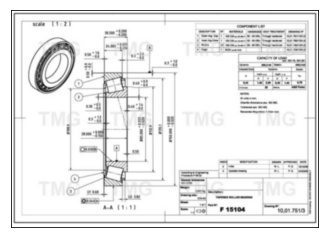

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [10]:
get_string('testdrawing.jpg')